In [19]:
import numpy as np 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt 
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [1]:
def data_visulization():
    # read dataset file
    df = pd.read_csv('dataset_1.txt', sep=',', header=None)
    df_sitting = df[df[24] == 1].values
    # In this example code, only accelerometer 1 data (column 1 to 3) is used
    plt.plot(df_sitting[:, 0:3])
    plt.show()


In [26]:
def data_visulizationGyro():
    # read dataset file
     for i in range(19):
        df = pd.read_csv('dataset_' + str(i + 1) + '.txt', sep=',', header=None)
        df_sitting = df[df[24] == 1].values
    # In this example code, only accelerometer 1 data (column 1 to 3) is used
        plt.plot(df_sitting[:, 0:3])
        plt.show()


In [3]:
def noise_removing():
    df = pd.read_csv('dataset_1.txt', sep=',', header=None)
    # Butterworth low-pass filter. You could try different parameters and other filters. 
    b, a = signal.butter(4, 0.04, 'low', analog=False)
    df_sitting = df[df[24] == 1].values
    for i in range(3):
        df_sitting[:,i] = signal.lfilter(b, a, df_sitting[:, i])
    plt.plot(df_sitting[15000:20000, 0:3])
    plt.show()

In [4]:
def feature_engineering_example():
    training = np.empty(shape=(0, 10))
    testing = np.empty(shape=(0, 10))
    # deal with each dataset file
    for i in range(19):
        df = pd.read_csv('dataset_' + str(i + 1) + '.txt', sep=',', header=None)
        print('deal with dataset ' + str(i + 1))
        for c in range(1, 14):
            activity_data = df[df[24] == c].values
            b, a = signal.butter(4, 0.04, 'low', analog=False)
            for j in range(24):
                activity_data[:, j] = signal.lfilter(b, a, activity_data[:, j])
            
            datat_len = len(activity_data)
            training_len = math.floor(datat_len * 0.8)
            training_data = activity_data[:training_len, :]
            testing_data = activity_data[training_len:, :]


In [ ]:
training_sample_number = training_len // 1000 + 1
            testing_sample_number = (datat_len - training_len) // 1000 + 1

            for s in range(training_sample_number):
                if s < training_sample_number - 1:
                    sample_data = training_data[1000*s:1000*(s + 1), :]
                else:
                    sample_data = training_data[1000*s:, :]

In [6]:
feature_sample = []
                for i in range(3):
                    feature_sample.append(np.min(sample_data[:, i]))
                    feature_sample.append(np.max(sample_data[:, i]))
                    feature_sample.append(np.mean(sample_data[:, i]))
                feature_sample.append(sample_data[0, -1])
                feature_sample = np.array([feature_sample])
                training = np.concatenate((training, feature_sample), axis=0)
            
            for s in range(testing_sample_number):
                if s < training_sample_number - 1:
                    sample_data = testing_data[1000*s:1000*(s + 1), :]
                else:
                    sample_data = testing_data[1000*s:, :]

                feature_sample = []
                for i in range(3):
                    feature_sample.append(np.min(sample_data[:, i]))
                    feature_sample.append(np.max(sample_data[:, i]))
                    feature_sample.append(np.mean(sample_data[:, i]))
                feature_sample.append(sample_data[0, -1])
                feature_sample = np.array([feature_sample])
                testing = np.concatenate((testing, feature_sample), axis=0)

    df_training = pd.DataFrame(training)
    df_testing = pd.DataFrame(testing)
    df_training.to_csv('training_data.csv', index=None, header=None)
    df_testing.to_csv('testing_data.csv', index=None, header=None)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)

In [7]:
def model_training_and_evaluation_example():
    df_training = pd.read_csv('training_data.csv', header=None)
    df_testing = pd.read_csv('testing_data.csv', header=None)

    y_train = df_training[9].values
    # Labels should start from 0 in sklearn
    y_train = y_train - 1
    df_training = df_training.drop([9], axis=1)
    X_train = df_training.values

    y_test = df_testing[9].values
    y_test = y_test - 1
    df_testing = df_testing.drop([9], axis=1)
    X_test = df_testing.values

In [8]:
scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)


IndentationError: unexpected indent (<ipython-input-8-81aa66935727>, line 2)

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

IndentationError: unexpected indent (<ipython-input-9-00c9b178c076>, line 2)

In [10]:
y_pred = knn.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

IndentationError: unexpected indent (<ipython-input-10-2593872e6a03>, line 2)

In [11]:
 print(confusion_matrix(y_test, y_pred))

NameError: name 'y_test' is not defined

In [12]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1,1e-2, 1e-3, 1e-4],
                     'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 100]},
                    {'kernel': ['linear'], 'C': [1e-3, 1e-2, 1e-1, 1, 10, 100]}]
    acc_scorer = make_scorer(accuracy_score)
    grid_obj  = GridSearchCV(SVC(), tuned_parameters, cv=10, scoring=acc_scorer)
    grid_obj  = grid_obj .fit(X_train, y_train)
    clf = grid_obj.best_estimator_
    print('best clf:', clf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


IndentationError: unexpected indent (<ipython-input-12-9c9efcfb08ab>, line 4)

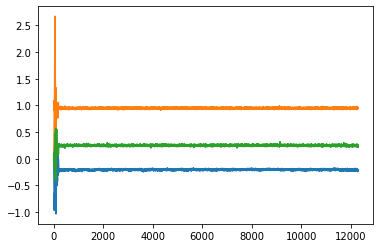

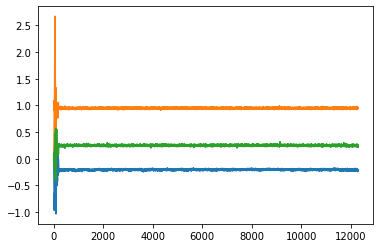

FileNotFoundError: [Errno 2] File b'dataset_2.txt' does not exist: b'dataset_2.txt'

In [29]:
if __name__ == '__main__':
    main()
    
    # data_visulization()
    # noise_removing()
    # feature_engineering_example()
    #model_training_and_evaluation_example()

In [28]:
def main():
    data_visulization()
    data_visulizationGyro()

